Twitter Movement Derivation & Vulnerable Locations
==================================================

In [19]:
import psycopg2, psycopg2.extras, psycopg2.pool, pickle, json, os
from multiprocessing import Pool
from collections import OrderedDict
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import seaborn as sns
%matplotlib inline

In [20]:
working_dir = 'working_data/zone_a_clustered/'
file_names = os.listdir(working_dir)

In [21]:
#Heavy lifting: Load all the users in parallel
def load_user(file_name):
    return json.load(open(working_dir+file_name,'r'))

pool = Pool(processes=24)
res = pool.map_async(load_user, file_names)
pool.close()
pool.join()

In [22]:
users = res.get()

## Tweets  & Clusters Per User?

In [34]:
tweet_count_per_user = [len(u['features']) for u in users]
clusters_per_user    = [ len(np.unique([f['properties']['cluster'] for f in u['features'] if f['properties']['cluster'] != None])) for u in users]

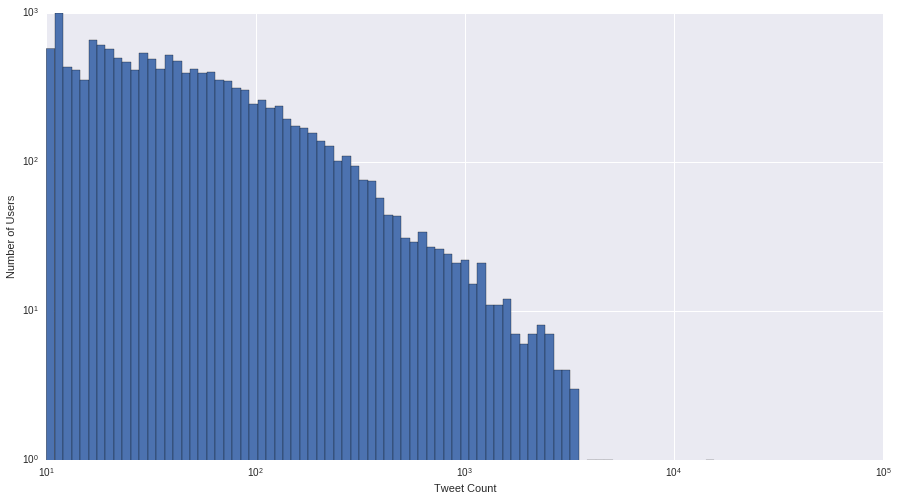

In [48]:
fig, ax = plt.subplots(1)
fig.set_size_inches(15,8)
ax.hist(tweet_count_per_user, bins=np.logspace(1,5,100))
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel("Tweet Count")
ax.set_ylabel("Number of Users")
None

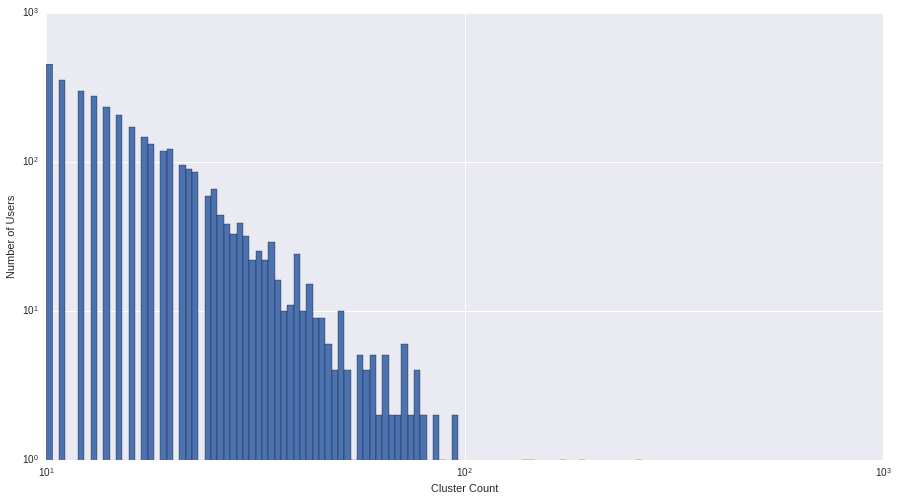

In [49]:
fig, ax = plt.subplots(1)
fig.set_size_inches(15,8)
ax.hist(clusters_per_user, bins=np.logspace(1,2.5,100))
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel("Cluster Count")
ax.set_ylabel("Number of Users")
None

In [50]:
len(users)

22042